In [2]:
!pip install selenium

!pip install selenium-stealth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


In [3]:
from selenium import webdriver

from selenium.webdriver.common.by import By

from time import sleep

import matplotlib.pyplot as plt
from yellowbrick.text import PosTagVisualizer
import seaborn as sns
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium_stealth import stealth
import random

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

import seaborn as sns

#rom fake_useragent import UserAgent

In [4]:
def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")

    driver = webdriver.Chrome(options=options)

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    user_agents = [
    # Add your list of user agents here
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
    ]

    # select random user agent
    user_agent = random.choice(user_agents)

    # pass in selected user agent as an argument
    options.add_argument(f'user-agent={user_agent}')

    return driver


In [5]:
driver = driversetup()

url = "https://www.fi.kayak.com/flights/HEL-AGP/2023-11-13?sort=bestflight_a&fs=cfc=0;stops=-2;baditin=baditin;bfc=0;transportation=transportation_plane,transportation_flight_train"


In [6]:

stealth(driver,

  languages=["en-US", "en"],

  vendor="Google Inc.",

  platform="Win32",

  webgl_vendor="Intel Inc.",

  renderer="Intel Iris OpenGL Engine",

  fix_hairline=True,

)

In [7]:
#with open('source.html', 'w') as f:
#
# f.write(driver.page_source)

In [8]:
driver.get(url)
while driver.execute_script("return document.readyState") != "complete":
  pass
#driver.title

#pressing the coockies buytton
wait = WebDriverWait(driver, 20)
wait.until(EC.visibility_of_element_located((By.XPATH,'//*[@id="portal-container"]/div/div[2]/div/div/div[2]/div/div[2]/button'))).click()


sleep(15)

#scrolling down to bottom
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
sleep(2)

#trying to press show more button to get more flights
for x in range(4):

  try:
    more_results_button = driver.find_element(By.CLASS_NAME, 'show-more-button')

    driver.execute_script("arguments[0].click();", more_results_button)

    sleep(2)

  except NoSuchElementException:
    print("show-more-button Element not found, OK!")

  sleep(5)



print()
flights = driver.find_elements(By.CLASS_NAME, 'nrc6-inner')
print(flights)

lst_prices = []
#list specifically for the prices as integers
lst_intprices = []
lst_airlines = []
lst_duration = []
#list specifically for the duration as float values
lst_floatduration = []
lst_stops = []
lst_layovertime = []
lst_layoverplace = []
lst_departuetime = []
lst_arrivaltime = []
lst_website = []

lst_temp = []

#source = requests.get(url).text
#soup = BeautifulSoup(source, 'lxml')
#print(soup)


for WebElement in flights:
    elementHTML = WebElement.get_attribute('outerHTML')
    elementSoup = BeautifulSoup(elementHTML, 'html.parser')

    lst_website.append('Kayak')

    #price
    temp_price = elementSoup.find('div', {'class': "nrc6-price-section"} )
    price = temp_price.find('div' , {'class': "f8F1-price-text"})

    #removing the \xa0 from the prices
    clean_price= price.text.replace('\xa0€','')
    clean_price2 = price.text.replace('\xa0','')
    lst_intprices.append(clean_price)
    lst_prices.append(clean_price2)


    #airline
    temp_airline = elementSoup.find('div', {'class': "nrc6-content-section"} )
    airline = temp_airline.find('div' , {'class': "J0g6-operator-text"})
    lst_airlines.append(airline.text)


    #duration
    temp_duration = elementSoup.find('div', {'class': "xdW8 xdW8-mod-full-airport"} )
    duration = temp_duration.find('div' , {'class': "vmXl vmXl-mod-variant-default"})

    clean_duration = duration.text.replace('t ', ':')
    clean_duration = clean_duration.replace('m', '')

    vals = clean_duration.split(':')
    t, hours = divmod(float(vals[0]), 24)
    t, minutes = divmod(float(vals[1]), 60)
    minutes = minutes / 60.0
    clean_duration = hours + minutes
    clean_duration = round(clean_duration, 2)

    lst_duration.append(duration.text)

    lst_floatduration.append(clean_duration)

    #stops
    temp_stops = elementSoup.find('span', {'class': 'JWEO-stops-text'})

    if temp_stops.text == '1 välilasku':
        clean_stops = temp_stops.text.replace(' välilasku', '')

    elif temp_stops.text == '2 välilaskua':
        clean_stops = temp_stops.text.replace(' välilaskua', '')

    else:
      clean_stops = temp_stops.text.replace ('suora lento', '0')

    lst_stops.append(clean_stops)


    #layovertime
    layovertime=elementSoup.find('div', {'class': 'JWEO'}).find('div', {'class': 'c_cgF c_cgF-mod-variant-full-airport'}).find("span")

    try:
      #splitting the attribute so there is only layover time and välilasku left
      layovertime = layovertime.span['title'].split(",")[0]
      #slicing the text so only the time is left
      layovertime=layovertime[0:6]

      #another way to do this is
      #layovertime = layovertime.replace("välilasku", "")

      lst_layovertime.append(layovertime)

    except AttributeError:
      lst_layovertime.append(None)


    #layoverplace
    layoverplace=elementSoup.find('div', {'class': 'JWEO'}).find('div', {'class': 'c_cgF c_cgF-mod-variant-full-airport'})

    try:
      #getting the layoverplace
      layoverplace = layoverplace.text
      lst_layoverplace.append(layoverplace)

    except AttributeError:
      lst_layoverplace.append(None)


    #departuretime
    departuretime=elementSoup.find('div',{'class':'vmXl vmXl-mod-variant-large'})
    departuretime=departuretime.find_all('span')
    lst_departuetime.append(departuretime[0].text)


    #arrivaltime
    arrivaltime=elementSoup.find('div',{'class':'vmXl vmXl-mod-variant-large'})
    arrivaltime=arrivaltime.find_all('span')
    lst_arrivaltime.append(arrivaltime[2].text)




driver.quit()


[<selenium.webdriver.remote.webelement.WebElement (session="15b1bb6ec9a5ec4b484234ad78f6b357", element="013A6EEC61E32983FFE3A962C0E836A7_element_94")>, <selenium.webdriver.remote.webelement.WebElement (session="15b1bb6ec9a5ec4b484234ad78f6b357", element="013A6EEC61E32983FFE3A962C0E836A7_element_95")>, <selenium.webdriver.remote.webelement.WebElement (session="15b1bb6ec9a5ec4b484234ad78f6b357", element="013A6EEC61E32983FFE3A962C0E836A7_element_96")>, <selenium.webdriver.remote.webelement.WebElement (session="15b1bb6ec9a5ec4b484234ad78f6b357", element="013A6EEC61E32983FFE3A962C0E836A7_element_97")>, <selenium.webdriver.remote.webelement.WebElement (session="15b1bb6ec9a5ec4b484234ad78f6b357", element="013A6EEC61E32983FFE3A962C0E836A7_element_98")>, <selenium.webdriver.remote.webelement.WebElement (session="15b1bb6ec9a5ec4b484234ad78f6b357", element="013A6EEC61E32983FFE3A962C0E836A7_element_99")>, <selenium.webdriver.remote.webelement.WebElement (session="15b1bb6ec9a5ec4b484234ad78f6b357"

In [9]:
print(lst_prices)
print(lst_intprices)
print(lst_airlines)
print(lst_duration)
print(lst_floatduration)
print(lst_layoverplace)
print(lst_layovertime)
print(lst_departuetime)
print(lst_arrivaltime)
print(lst_stops)

['92€', '87€', '57€', '248€', '82€', '93€', '76€', '272€', '113€', '86€', '76€', '161€', '62€', '121€', '73€', '104€', '132€', '131€', '110€', '173€', '139€', '77€', '118€', '187€', '166€', '170€', '110€', '163€', '118€', '188€', '126€', '223€', '141€', '110€', '155€', '166€', '118€', '63€', '318€', '262€', '177€', '173€', '327€', '129€', '192€', '110€', '163€', '113€', '327€', '187€', '220€', '244€', '173€', '174€', '121€', '244€', '110€', '335€', '128€', '277€', '87€', '192€', '151€', '122€', '119€', '253€', '490€', '64€', '167€', '595€', '111€', '341€', '87€', '294€', '327€', '237€']
['92', '87', '57', '248', '82', '93', '76', '272', '113', '86', '76', '161', '62', '121', '73', '104', '132', '131', '110', '173', '139', '77', '118', '187', '166', '170', '110', '163', '118', '188', '126', '223', '141', '110', '155', '166', '118', '63', '318', '262', '177', '173', '327', '129', '192', '110', '163', '113', '327', '187', '220', '244', '173', '174', '121', '244', '110', '335', '128', '277

In [10]:
print(len(lst_prices))
print(len(lst_airlines))
print(len(lst_duration))
print(len(lst_layoverplace))
print(len(lst_layovertime))
print(len(lst_departuetime))
print(len(lst_arrivaltime))
print(len(lst_stops))

76
76
76
76
76
76
76
76


In [11]:
driver = driversetup()

url2 = "https://www.momondo.fi/flight-search/HEL-AGP/2023-11-13?sort=bestflight_a&fs=cfc=0;stops=-2;baditin=baditin;bfc=0;transportation=transportation_plane,transportation_flight_train"


In [12]:

stealth(driver,

  languages=["en-US", "en"],

  vendor="Google Inc.",

  platform="Win32",

  webgl_vendor="Intel Inc.",

  renderer="Intel Iris OpenGL Engine",

  fix_hairline=True,

)

In [13]:
#with open('source1.html', 'w') as g:
#
# g.write(driver.page_source)

In [14]:
from operator import and_
driver.get(url2)
while driver.execute_script("return document.readyState") != "complete":
  pass
#driver.title

#pressing the coockies buytton
wait = WebDriverWait(driver, 20)
wait.until(EC.visibility_of_element_located((By.XPATH,'//*[@id="portal-container"]/div/div[2]/div/div/div[2]/div/div[2]/button'))).click()


sleep(15)

#scrolling down to bottom
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
sleep(2)

#trying to press show more button to get more flights
for x in range(4):

  try:
    more_results_button = driver.find_element(By.CLASS_NAME, 'show-more-button')

    driver.execute_script("arguments[0].click();", more_results_button)

    sleep(2)

  except NoSuchElementException:
    print("show-more-button Element not found, OK!")

  sleep(5)



print()
flights = driver.find_elements(By.CLASS_NAME, 'nrc6-inner')
print(flights)

lst2_prices = []
lst2_intprices = []
lst2_airlines = []
lst2_duration = []
lst2_floatduration = []
lst2_stops = []
lst2_layovertime = []
lst2_layoverplace = []
lst2_departuetime = []
lst2_arrivaltime = []
lst2_website = []

lst2_temp = []

#source = requests.get(url).text
#soup = BeautifulSoup(source, 'lxml')
#print(soup)


for WebElement in flights:
    elementHTML = WebElement.get_attribute('outerHTML')
    elementSoup = BeautifulSoup(elementHTML, 'html.parser')

    lst2_website.append('Momondo')

    #price
    temp_price = elementSoup.find('div', {'class': "nrc6-price-section"} )
    price = temp_price.find('div' , {'class': "f8F1-price-text"})

    #removing the \xa0 from the prices
    clean_price= price.text.replace('\xa0€','')
    lst2_intprices.append(clean_price)
    lst2_prices.append(price.text)


    #airline
    temp_airline = elementSoup.find('div', {'class': "nrc6-content-section"} )
    airline = temp_airline.find('div' , {'class': "J0g6-operator-text"})
    lst2_airlines.append(airline.text)


    #duration
    temp_duration = elementSoup.find('div', {'class': "xdW8 xdW8-mod-full-airport"} )
    duration = temp_duration.find('div' , {'class': "vmXl vmXl-mod-variant-default"})

    #replaces letters t and m with empty strings
    clean_duration = duration.text.replace('t ', ':')
    clean_duration = clean_duration.replace('m', '')

    #converts the duration into a float value
    vals = clean_duration.split(':')
    t, hours = divmod(float(vals[0]), 24)
    t, minutes = divmod(float(vals[1]), 60)
    minutes = minutes / 60.0
    clean_duration = hours + minutes
    clean_duration = round(clean_duration, 2)

    lst2_duration.append(duration.text)

    lst2_floatduration.append(clean_duration)

    #stops
    temp_stops = elementSoup.find('span', {'class': 'JWEO-stops-text'})
    if temp_stops.text == '1 välilasku':
        clean_stops = temp_stops.text.replace(' välilasku', '')

    elif temp_stops.text == '2 välilaskua':
        clean_stops = temp_stops.text.replace(' välilaskua', '')

    else:
      clean_stops = temp_stops.text.replace ('suora lento', '0')

    lst2_stops.append(clean_stops)

    #layovertime
    layovertime=elementSoup.find('div', {'class': 'JWEO'}).find('div', {'class': 'c_cgF c_cgF-mod-variant-full-airport'}).find("span")

    try:
      #splitting the attribute so there is only layover time and välilasku left
      layovertime = layovertime.span['title'].split(",")[0]
      #slicing the text so only the time is left
      layovertime=layovertime[0:6]

      #another way to do this is
      #layovertime = layovertime.replace("välilasku", "")

      lst2_layovertime.append(layovertime)

    except AttributeError:
      lst2_layovertime.append(None)


    #layoverplace
    layoverplace=elementSoup.find('div', {'class': 'JWEO'}).find('div', {'class': 'c_cgF c_cgF-mod-variant-full-airport'})

    try:
      #getting the layoverplace
      layoverplace = layoverplace.text
      lst2_layoverplace.append(layoverplace)

    except AttributeError:
      lst2_layoverplace.append(None)


    #departuretime
    departuretime=elementSoup.find('div',{'class':'vmXl vmXl-mod-variant-large'})
    departuretime=departuretime.find_all('span')
    lst2_departuetime.append(departuretime[0].text)


    #arrivaltime
    arrivaltime=elementSoup.find('div',{'class':'vmXl vmXl-mod-variant-large'})
    arrivaltime=arrivaltime.find_all('span')
    lst2_arrivaltime.append(arrivaltime[2].text)


driver.quit()


[<selenium.webdriver.remote.webelement.WebElement (session="cc3b408649a4b79bddf2ecd384f90d9d", element="F3E5924A55FCAD699C60AC06DCC39197_element_64")>, <selenium.webdriver.remote.webelement.WebElement (session="cc3b408649a4b79bddf2ecd384f90d9d", element="F3E5924A55FCAD699C60AC06DCC39197_element_65")>, <selenium.webdriver.remote.webelement.WebElement (session="cc3b408649a4b79bddf2ecd384f90d9d", element="F3E5924A55FCAD699C60AC06DCC39197_element_66")>, <selenium.webdriver.remote.webelement.WebElement (session="cc3b408649a4b79bddf2ecd384f90d9d", element="F3E5924A55FCAD699C60AC06DCC39197_element_67")>, <selenium.webdriver.remote.webelement.WebElement (session="cc3b408649a4b79bddf2ecd384f90d9d", element="F3E5924A55FCAD699C60AC06DCC39197_element_68")>, <selenium.webdriver.remote.webelement.WebElement (session="cc3b408649a4b79bddf2ecd384f90d9d", element="F3E5924A55FCAD699C60AC06DCC39197_element_69")>, <selenium.webdriver.remote.webelement.WebElement (session="cc3b408649a4b79bddf2ecd384f90d9d"

In [15]:
print(lst2_prices)
print(lst2_intprices)
print(lst2_airlines)
print(lst2_duration)
print(lst2_floatduration)
print(lst2_layoverplace)
print(lst2_layovertime)
print(lst2_departuetime)
print(lst2_arrivaltime)
print(lst2_stops)

['92\xa0€', '87\xa0€', '57\xa0€', '248\xa0€', '82\xa0€', '93\xa0€', '76\xa0€', '280\xa0€', '113\xa0€', '86\xa0€', '76\xa0€', '161\xa0€', '62\xa0€', '120\xa0€', '73\xa0€', '104\xa0€', '132\xa0€', '130\xa0€', '110\xa0€', '173\xa0€', '139\xa0€', '203\xa0€', '77\xa0€', '196\xa0€', '118\xa0€', '168\xa0€', '110\xa0€', '162\xa0€', '118\xa0€', '187\xa0€', '126\xa0€', '254\xa0€', '139\xa0€', '110\xa0€', '223\xa0€', '155\xa0€', '166\xa0€', '63\xa0€', '177\xa0€', '173\xa0€', '262\xa0€', '129\xa0€', '110\xa0€', '318\xa0€', '328\xa0€', '113\xa0€', '163\xa0€', '200\xa0€', '198\xa0€', '305\xa0€', '220\xa0€', '228\xa0€', '244\xa0€', '173\xa0€', '110\xa0€', '174\xa0€', '121\xa0€', '244\xa0€', '128\xa0€', '122\xa0€', '335\xa0€', '277\xa0€', '87\xa0€', '151\xa0€', '67\xa0€', '119\xa0€', '253\xa0€', '192\xa0€', '111\xa0€', '490\xa0€', '167\xa0€', '341\xa0€', '303\xa0€', '596\xa0€', '87\xa0€', '199\xa0€']
['92', '87', '57', '248', '82', '93', '76', '280', '113', '86', '76', '161', '62', '120', '73', '104',

In [16]:
print(len(lst2_prices))
print(len(lst2_airlines))
print(len(lst2_duration))
print(len(lst2_layoverplace))
print(len(lst2_layovertime))
print(len(lst2_departuetime))
print(len(lst2_arrivaltime))
print(len(lst2_stops))

76
76
76
76
76
76
76
76


In [17]:
"""
driver = driversetup()
url = "https://www.expedia.fi/Flights-Search?flight-type=on&mode=search&trip=oneway&leg1=from:Helsinki%20(HEL-Vantaa),to:M%C3%A1laga,%20Spain%20(AGP),departure:13/11/2023TANYT&options=cabinclass:economy&fromDate=13/11/2023&d1=2023-11-13&passengers=adults:1,infantinlap:N"
"""

'\ndriver = driversetup()\nurl = "https://www.expedia.fi/Flights-Search?flight-type=on&mode=search&trip=oneway&leg1=from:Helsinki%20(HEL-Vantaa),to:M%C3%A1laga,%20Spain%20(AGP),departure:13/11/2023TANYT&options=cabinclass:economy&fromDate=13/11/2023&d1=2023-11-13&passengers=adults:1,infantinlap:N"\n'

In [18]:
"""
stealth(driver,

  languages=["en-US", "en"],

  vendor="Google Inc.",

  platform="Win32",

  webgl_vendor="Intel Inc.",

  renderer="Intel Iris OpenGL Engine",

  fix_hairline=True,

)
"""

'\nstealth(driver,\n\n  languages=["en-US", "en"],\n\n  vendor="Google Inc.",\n\n  platform="Win32",\n\n  webgl_vendor="Intel Inc.",\n\n  renderer="Intel Iris OpenGL Engine",\n\n  fix_hairline=True,\n\n)\n'

In [19]:
"""
driver.get(url)
sleep(5)

#scrolling down to bottom
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
sleep(5)

#trying to press show more button to get more flights
for x in range(4):

  try:
    more_results_button = driver.find_element(By.NAME, 'showMoreButton')

    driver.execute_script("arguments[0].click();", more_results_button)

    sleep(4)

  except NoSuchElementException:
    print("showMoreButton Element not found, OK!")

  sleep(5)

#scrape all the needed info
flights = driver.find_elements(By.CLASS_NAME, 'uitk-card-content-section-padded')

#We have to remove the first index since the first element is a sign in advertisment
flights = flights[1:]
#initiate all the needed arrays
lst3_prices = []
lst3_intprices = []
lst3_airlines = []
lst3_duration = []
lst3_floatduration = []
lst3_stops = []
lst3_layovertime = []
lst3_layoverplace = []
lst3_departuetime = []
lst3_arrivaltime = []
lst3_website = []

sleep(5)

for WebElement in flights:
    elementHTML = WebElement.get_attribute('outerHTML')
    elementSoup = BeautifulSoup(elementHTML, 'html.parser')

    lst3_website.append('Expedia')

    #price
    temp_price = elementSoup.find('div', {'class': "uitk-price-lockup align-end"} )
    price = temp_price.find('span' , {'class': "uitk-price-a11y is-visually-hidden"})

    #removing the \xa0 from the prices
    clean_price= price.text.replace('$','')
    lst3_intprices.append(clean_price)
    lst3_prices.append(price.text)


    #airline
    temp_airline = elementSoup.find('div', {'class': "uitk-layout-flex uitk-layout-flex-align-content-center uitk-layout-flex-gap-one"} )
    #airline = temp_airline.find('div', {'class': "uitk-layout-grid uitk-layout-grid-align-items-center uitk-layout-grid-has-auto-columns uitk-layout-grid-display-grid"} )
    #airline = airline.find('div', {'class': "uitk-spacing uitk-spacing-padding-inlineend-two uitk-spacing-padding-blockend-one"} )
    #airline = airline.find('div' , {'class': "uitk-layout-flex uitk-layout-flex-align-content-center uitk-layout-flex-gap-one"})
    airline = temp_airline.find('div' , {'class': "uitk-text truncate-lines-2 uitk-type-200 uitk-text-default-theme"})
    lst3_airlines.append(airline.text)


    #duration
    temp_duration = elementSoup.find('div', {'class': "uitk-layout-grid uitk-layout-grid-has-auto-columns uitk-layout-grid-has-columns-by-medium uitk-layout-grid-has-space uitk-layout-grid-display-grid"} )
    duration = temp_duration.find('div' , {'class': "uitk-layout-grid-item uitk-layout-grid-item-has-column-start-by-medium"})
    duration = duration.find('div' , {'class': "uitk-text uitk-type-200 uitk-text-emphasis-theme"})

    print(duration)

    clean_duration = duration.text.replace('h ', ':')
    clean_duration = clean_duration.replace('m', '')

    vals = clean_duration.split(':')
    t, hours = divmod(float(vals[0]), 24)
    t, minutes = divmod(float(vals[1]), 60)
    minutes = minutes / 60.0
    clean_duration = hours + minutes
    clean_duration = round(clean_duration, 2)

    lst3_duration.append(duration.text)

    lst3_floatduration.append(clean_duration)



    #amount of stops
    temp_stops = elementSoup.find('div', {'class': "uitk-text uitk-type-200 uitk-text-emphasis-theme"} )
    #stops=temp_stops.find('div',{'class':'uitk-text truncate uitk-type-200 uitk-type-bold uitk-text-default-theme uitk-experimental-timeline-stops-text'})

    try:
      #casts the string into a int
      numbersonly=temp_stops.text
      print()
      lst3_stops.append(int(numbersonly.split(" ")[0]))

    except ValueError:
      #if the cast gives valueError there are no ints in string
      #in that case appends 0 since it means there are no layover flights
      lst3_stops.append(0)


    #layover
    layover=elementSoup.find('div', {'class': "uitk-text uitk-text-spacing-one truncate uitk-type-200 uitk-text-default-theme"} )
    #layover=layover.find_all('div',{'class':'uitk-text truncate uitk-type-200 uitk-type-regular uitk-text-default-theme uitk-experimental-timeline-stops-text'})

    try:
      #using try except to find the flight without stops/ they will throw errors
      layover=layover.find_all('div',{'class':'uitk-text truncate uitk-type-200 uitk-type-regular uitk-text-default-theme uitk-experimental-timeline-stops-text'})

      #getting the 2nd index with layover time and place
      layover=layover[1]

      #splitting the attribute so layover time and place is in different arrays
      layover = layover.text.split("in")

      #since we split the layovertime and layoverplace we can append it here instantly
      lst3_layovertime.append(layover[0])
      lst3_layoverplace.append(layover[1])

    except (AttributeError,IndexError) as e:
      #since there is a error it means the flight is a direct one with no layover time or place
      lst3_layovertime.append(None)
      lst3_layoverplace.append(None)


    #departuretime
    departuretime = elementSoup.find('div',{'class':'uitk-experimental-timeline'})
    departuretime = departuretime.find('div',{'class':'uitk-layout-flex uitk-layout-flex-align-items-center'})
    departuretime = departuretime.find('div',{'class':'uitk-text uitk-type-400 uitk-type-bold uitk-text-default-theme uitk-spacing uitk-experimental-timeline-time uitk-spacing-margin-inlineend-two uitk-layout-flex-item'})

    departuretime = departuretime.text.split("-")

    lst3_departuetime.append(departuretime[0])


    #arrivaltime
    #arrivaltime=elementSoup.find('div',{'class':'uitk-experimental-timeline'})
    #arrivaltime=arrivaltime.find('div',{'class':'uitk-layout-flex uitk-layout-flex-align-items-center'})
    #arrivaltime=arrivaltime.find('div',{'class':'uitk-text uitk-type-end uitk-type-400 uitk-type-bold uitk-text-default-theme uitk-spacing uitk-experimental-timeline-time uitk-spacing-margin-inlinestart-two uitk-layout-flex-item'})
    lst3_arrivaltime.append(departuretime[1])


driver.quit()
"""

'\ndriver.get(url)\nsleep(5)\n\n#scrolling down to bottom\ndriver.execute_script("window.scrollTo(0, document.body.scrollHeight)")\nsleep(5)\n\n#trying to press show more button to get more flights\nfor x in range(4):\n\n  try:\n    more_results_button = driver.find_element(By.NAME, \'showMoreButton\')\n\n    driver.execute_script("arguments[0].click();", more_results_button)\n\n    sleep(4)\n\n  except NoSuchElementException:\n    print("showMoreButton Element not found, OK!")\n\n  sleep(5)\n\n#scrape all the needed info\nflights = driver.find_elements(By.CLASS_NAME, \'uitk-card-content-section-padded\')\n\n#We have to remove the first index since the first element is a sign in advertisment\nflights = flights[1:]\n#initiate all the needed arrays\nlst3_prices = []\nlst3_intprices = []\nlst3_airlines = []\nlst3_duration = []\nlst3_floatduration = []\nlst3_stops = []\nlst3_layovertime = []\nlst3_layoverplace = []\nlst3_departuetime = []\nlst3_arrivaltime = []\nlst3_website = []\n\nsleep(

In [20]:
"""
print(lst3_prices)
print(lst3_airlines)
print(lst3_duration)
print(lst3_layoverplace)
print(lst3_layovertime)
print(lst3_departuetime)
print(lst3_arrivaltime)
print(lst3_stops)
"""

'\nprint(lst3_prices)\nprint(lst3_airlines)\nprint(lst3_duration)\nprint(lst3_layoverplace)\nprint(lst3_layovertime)\nprint(lst3_departuetime)\nprint(lst3_arrivaltime)\nprint(lst3_stops)\n'

In [21]:
"""
print(len(lst3_prices))
print(len(lst3_airlines))
print(len(lst3_duration))
print(len(lst3_layoverplace))
print(len(lst3_layovertime))
print(len(lst3_departuetime))
print(len(lst3_arrivaltime))
print(len(lst3_stops))
"""

'\nprint(len(lst3_prices))\nprint(len(lst3_airlines))\nprint(len(lst3_duration))\nprint(len(lst3_layoverplace))\nprint(len(lst3_layovertime))\nprint(len(lst3_departuetime))\nprint(len(lst3_arrivaltime))\nprint(len(lst3_stops))\n'

In [22]:
df1 = pd.DataFrame()

#Dataframe dictionary and inserting arrays
dictArray = {'Price': lst_prices,
             'Airline': lst_airlines,
             'Duration': lst_duration,
             'Stops': lst_stops,
             'Layover_place': lst_layoverplace,
             'Layover_time': lst_layovertime,
             'Departure_time': lst_departuetime,
             'Arrival_time': lst_arrivaltime,
             'Website': lst_website}
df_temp = pd.DataFrame.from_dict(dictArray, orient='index')
df_temp = df_temp.transpose()
df1 = df1.append(df_temp, ignore_index=True)

#40 long dataframe
df1.head(50)

<ipython-input-22-02c706ed19cb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df_temp, ignore_index=True)


,Price,Airline,Duration,Stops,Layover_place,Layover_time,Departure_time,Arrival_time,Website
0,92€,Scandinavian Airlines,8t 50m,1,CPH,3t 15m,10:05,17:55,Kayak
1,87€,"Norwegian, Ryanair",7t 05m,1,ARN,1t 40m,09:15,15:20,Kayak
2,57€,Ryanair,22t 40m,1,STN,16t 35,22:10,19:50+1,Kayak
3,248€,Norwegian,4t 45m,0,,None,12:00,15:45,Kayak
4,82€,Scandinavian Airlines,8t 50m,1,CPH,3t 15m,10:05,17:55,Kayak
5,93€,Scandinavian Airlines,8t 10m,1,ARN,2t 45m,10:15,17:25,Kayak
6,76€,"Norwegian, Ryanair",8t 40m,1,ARN,3t 05m,07:40,15:20,Kayak
7,272€,Finnair,4t 45m,0,,None,06:30,10:15,Kayak
8,113€,"Finnair, Norwegian",6t 45m,1,ARN,1t 25m,12:35,18:20,Kayak
9,86€,Norwegian,10t 05m,1,ARN,4t 45m,09:15,18:20,Kayak


In [23]:
df2 = pd.DataFrame()

#Dataframe dictionary and inserting arrays
dictArray = {'Price': lst2_prices,
             'Airline': lst2_airlines,
             'Duration': lst2_duration,
             'Stops': lst2_stops,
             'Layover_place': lst2_layoverplace,
             'Layover_time': lst2_layovertime,
             'Departure_time': lst2_departuetime,
             'Arrival_time': lst2_arrivaltime,
             'Website': lst2_website
             }
df_temp = pd.DataFrame.from_dict(dictArray, orient='index')
df_temp = df_temp.transpose()
df2 = df2.append(df_temp, ignore_index=True)

#50 long dataframe
df2.head(50)

<ipython-input-23-9f0befa3e0b9>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df_temp, ignore_index=True)


,Price,Airline,Duration,Stops,Layover_place,Layover_time,Departure_time,Arrival_time,Website
0,92 €,Scandinavian Airlines,8t 50m,1,CPH,3t 15m,10:05,17:55,Momondo
1,87 €,"Norwegian, Ryanair",7t 05m,1,ARN,1t 40m,09:15,15:20,Momondo
2,57 €,Ryanair,22t 40m,1,STN,16t 35,22:10,19:50+1,Momondo
3,248 €,Norwegian,4t 45m,0,,None,12:00,15:45,Momondo
4,82 €,Scandinavian Airlines,8t 50m,1,CPH,3t 15m,10:05,17:55,Momondo
5,93 €,Scandinavian Airlines,8t 10m,1,ARN,2t 45m,10:15,17:25,Momondo
6,76 €,"Norwegian, Ryanair",8t 40m,1,ARN,3t 05m,07:40,15:20,Momondo
7,280 €,Finnair,4t 45m,0,,None,06:30,10:15,Momondo
8,113 €,"Finnair, Norwegian",6t 45m,1,ARN,1t 25m,12:35,18:20,Momondo
9,86 €,Norwegian,10t 05m,1,ARN,4t 45m,09:15,18:20,Momondo


In [24]:
"""
df3 = pd.DataFrame()

#Dataframe dictionary and inserting arrays
dictArray = {'Price': lst3_prices,
             'Airline': lst3_airlines,
             'Duration': lst3_duration,
             'Stops': lst3_stops,
             'Layover_place': lst3_layoverplace,
             'Layover_time': lst3_layovertime,
             'Departure_time': lst3_departuetime,
             'Arrival_time': lst3_arrivaltime,
             'Website': lst3_website
             }
df_temp = pd.DataFrame.from_dict(dictArray, orient='index')
df_temp = df_temp.transpose()
df3 = df3.append(df_temp, ignore_index=True)

#50 long dataframe
df3.head(50)
"""

"\ndf3 = pd.DataFrame()\n\n#Dataframe dictionary and inserting arrays\ndictArray = {'Price': lst3_prices,\n             'Airline': lst3_airlines,\n             'Duration': lst3_duration,\n             'Stops': lst3_stops,\n             'Layover_place': lst3_layoverplace,\n             'Layover_time': lst3_layovertime,\n             'Departure_time': lst3_departuetime,\n             'Arrival_time': lst3_arrivaltime,\n             'Website': lst3_website\n             }\ndf_temp = pd.DataFrame.from_dict(dictArray, orient='index')\ndf_temp = df_temp.transpose()\ndf3 = df3.append(df_temp, ignore_index=True)\n\n#50 long dataframe\ndf3.head(50)\n"

In [25]:
# Combines the two dataframes and gets rid of duplicates
final_list = pd.concat([df1,df2]).reset_index(drop=True)

id = []

for i in range(len(final_list.index)):
  id.append(i)

final_list['ID'] = id

final_list.style.hide_columns(["ID"])

final_list.to_csv('final_list.csv')

final_list

<ipython-input-25-0a8deb2e9a94>:11: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="columns")`
  final_list.style.hide_columns(["ID"])


,Price,Airline,Duration,Stops,Layover_place,Layover_time,Departure_time,Arrival_time,Website,ID
0,92€,Scandinavian Airlines,8t 50m,1,CPH,3t 15m,10:05,17:55,Kayak,0
1,87€,"Norwegian, Ryanair",7t 05m,1,ARN,1t 40m,09:15,15:20,Kayak,1
2,57€,Ryanair,22t 40m,1,STN,16t 35,22:10,19:50+1,Kayak,2
3,248€,Norwegian,4t 45m,0,,None,12:00,15:45,Kayak,3
4,82€,Scandinavian Airlines,8t 50m,1,CPH,3t 15m,10:05,17:55,Kayak,4
...,...,...,...,...,...,...,...,...,...,...
147,341 €,Iberia,16t 50m,1,MAD,11t 10,16:50,08:40+1,Momondo,147
148,303 €,"Finnair, Air France",16t 40m,1,CDG,11t 05,20:30,12:10+1,Momondo,148
149,596 €,Air France,6t 40m,1,CDG,0t 45m,06:30,12:10,Momondo,149
150,87 €,Norwegian,27t 20m,1,ARN,22t 00,16:40,19:00+1,Momondo,150


In [26]:
df1_1 = pd.DataFrame()

#Dataframe dictionary and inserting arrays
dictArray = {'Price in €': lst_intprices,
             'Airline': lst_airlines,
             'Duration (hours)': lst_floatduration,
             'Stops': lst_stops,
             'Layover_place': lst_layoverplace,
             'Layover_time': lst_layovertime,
             'Departure_time': lst_departuetime,
             'Arrival_time': lst_arrivaltime,
             'Website': lst_website}
df_temp = pd.DataFrame.from_dict(dictArray, orient='index')
df_temp = df_temp.transpose()
df1_1 = df1_1.append(df_temp, ignore_index=True)

df2_1 = pd.DataFrame()

#Dataframe dictionary and inserting arrays
dictArray = {'Price in €': lst2_intprices,
             'Airline': lst2_airlines,
             'Duration (hours)': lst2_floatduration,
             'Stops': lst2_stops,
             'Layover_place': lst2_layoverplace,
             'Layover_time': lst2_layovertime,
             'Departure_time': lst2_departuetime,
             'Arrival_time': lst2_arrivaltime,
             'Website': lst2_website
             }
df_temp = pd.DataFrame.from_dict(dictArray, orient='index')
df_temp = df_temp.transpose()
df2_1 = df2_1.append(df_temp, ignore_index=True)

"""
df3_1 = pd.DataFrame()

#Dataframe dictionary and inserting arrays
dictArray = {'Price': lst3_intprices,
             'Airline': lst3_airlines,
             'Duration (hours)': lst3_floatduration,
             'Stops': lst3_stops,
             'Layover_place': lst3_layoverplace,
             'Layover_time': lst3_layovertime,
             'Departure_time': lst3_departuetime,
             'Arrival_time': lst3_arrivaltime,
             'Website': lst3_website
             }
df_temp = pd.DataFrame.from_dict(dictArray, orient='index')
df_temp = df_temp.transpose()
df3_1 = df3_1.append(df_temp, ignore_index=True)
"""

final_list2 = pd.concat([df1_1,df2_1]).reset_index(drop=True)

id = []

for i in range(len(final_list2.index)):
  id.append(i)

final_list2['ID'] = id

final_list2.style.hide_columns(["ID"])

final_list2.to_csv('final_list2.csv')

final_list2

<ipython-input-26-3305ec12d06a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_1 = df1_1.append(df_temp, ignore_index=True)
<ipython-input-26-3305ec12d06a>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_1 = df2_1.append(df_temp, ignore_index=True)
<ipython-input-26-3305ec12d06a>:62: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="columns")`
  final_list2.style.hide_columns(["ID"])


,Price in €,Airline,Duration (hours),Stops,Layover_place,Layover_time,Departure_time,Arrival_time,Website,ID
0,92,Scandinavian Airlines,8.83,1,CPH,3t 15m,10:05,17:55,Kayak,0
1,87,"Norwegian, Ryanair",7.08,1,ARN,1t 40m,09:15,15:20,Kayak,1
2,57,Ryanair,22.67,1,STN,16t 35,22:10,19:50+1,Kayak,2
3,248,Norwegian,4.75,0,,None,12:00,15:45,Kayak,3
4,82,Scandinavian Airlines,8.83,1,CPH,3t 15m,10:05,17:55,Kayak,4
...,...,...,...,...,...,...,...,...,...,...
147,341,Iberia,16.83,1,MAD,11t 10,16:50,08:40+1,Momondo,147
148,303,"Finnair, Air France",16.67,1,CDG,11t 05,20:30,12:10+1,Momondo,148
149,596,Air France,6.67,1,CDG,0t 45m,06:30,12:10,Momondo,149
150,87,Norwegian,3.33,1,ARN,22t 00,16:40,19:00+1,Momondo,150


In [27]:
df1_1

,Price in €,Airline,Duration (hours),Stops,Layover_place,Layover_time,Departure_time,Arrival_time,Website
0,92,Scandinavian Airlines,8.83,1,CPH,3t 15m,10:05,17:55,Kayak
1,87,"Norwegian, Ryanair",7.08,1,ARN,1t 40m,09:15,15:20,Kayak
2,57,Ryanair,22.67,1,STN,16t 35,22:10,19:50+1,Kayak
3,248,Norwegian,4.75,0,,None,12:00,15:45,Kayak
4,82,Scandinavian Airlines,8.83,1,CPH,3t 15m,10:05,17:55,Kayak
...,...,...,...,...,...,...,...,...,...
71,341,Iberia,16.83,1,MAD,11t 10,16:50,08:40+1,Kayak
72,87,Norwegian,3.33,1,ARN,22t 00,16:40,19:00+1,Kayak
73,294,British Airways,20.67,1,LHR-LGW,14t 50,16:00,11:40+1,Kayak
74,327,Air France,19.5,1,CDG,13t 40,17:40,12:10+1,Kayak


In [28]:
final_list2 = final_list2.astype({'Price in €':'float', 'Stops':'int', 'Airline':'string', 'Duration (hours)':'float', 'Layover_place':'string', 'Website':'string'})
print(final_list2.dtypes)

Price in €          float64
Airline              string
Duration (hours)    float64
Stops                 int64
Layover_place        string
Layover_time         object
Departure_time       object
Arrival_time         object
Website              string
ID                    int64
dtype: object


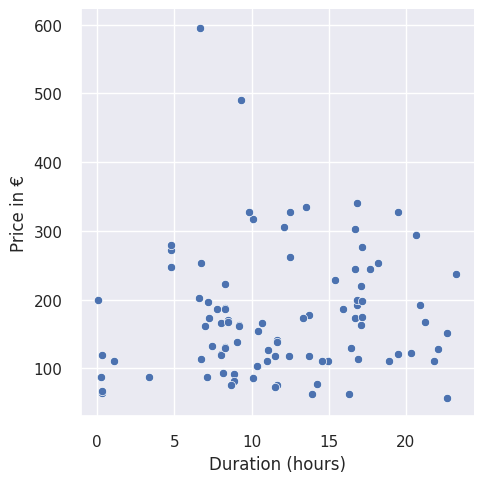

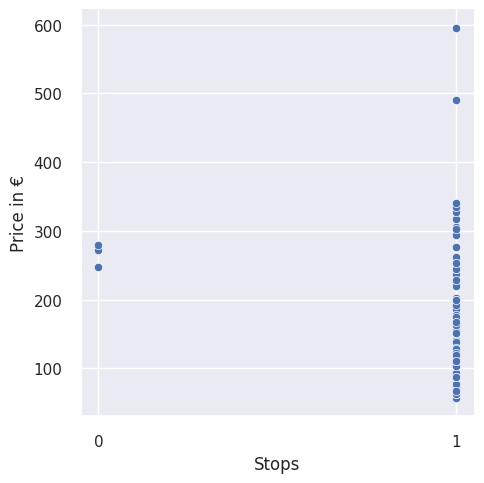

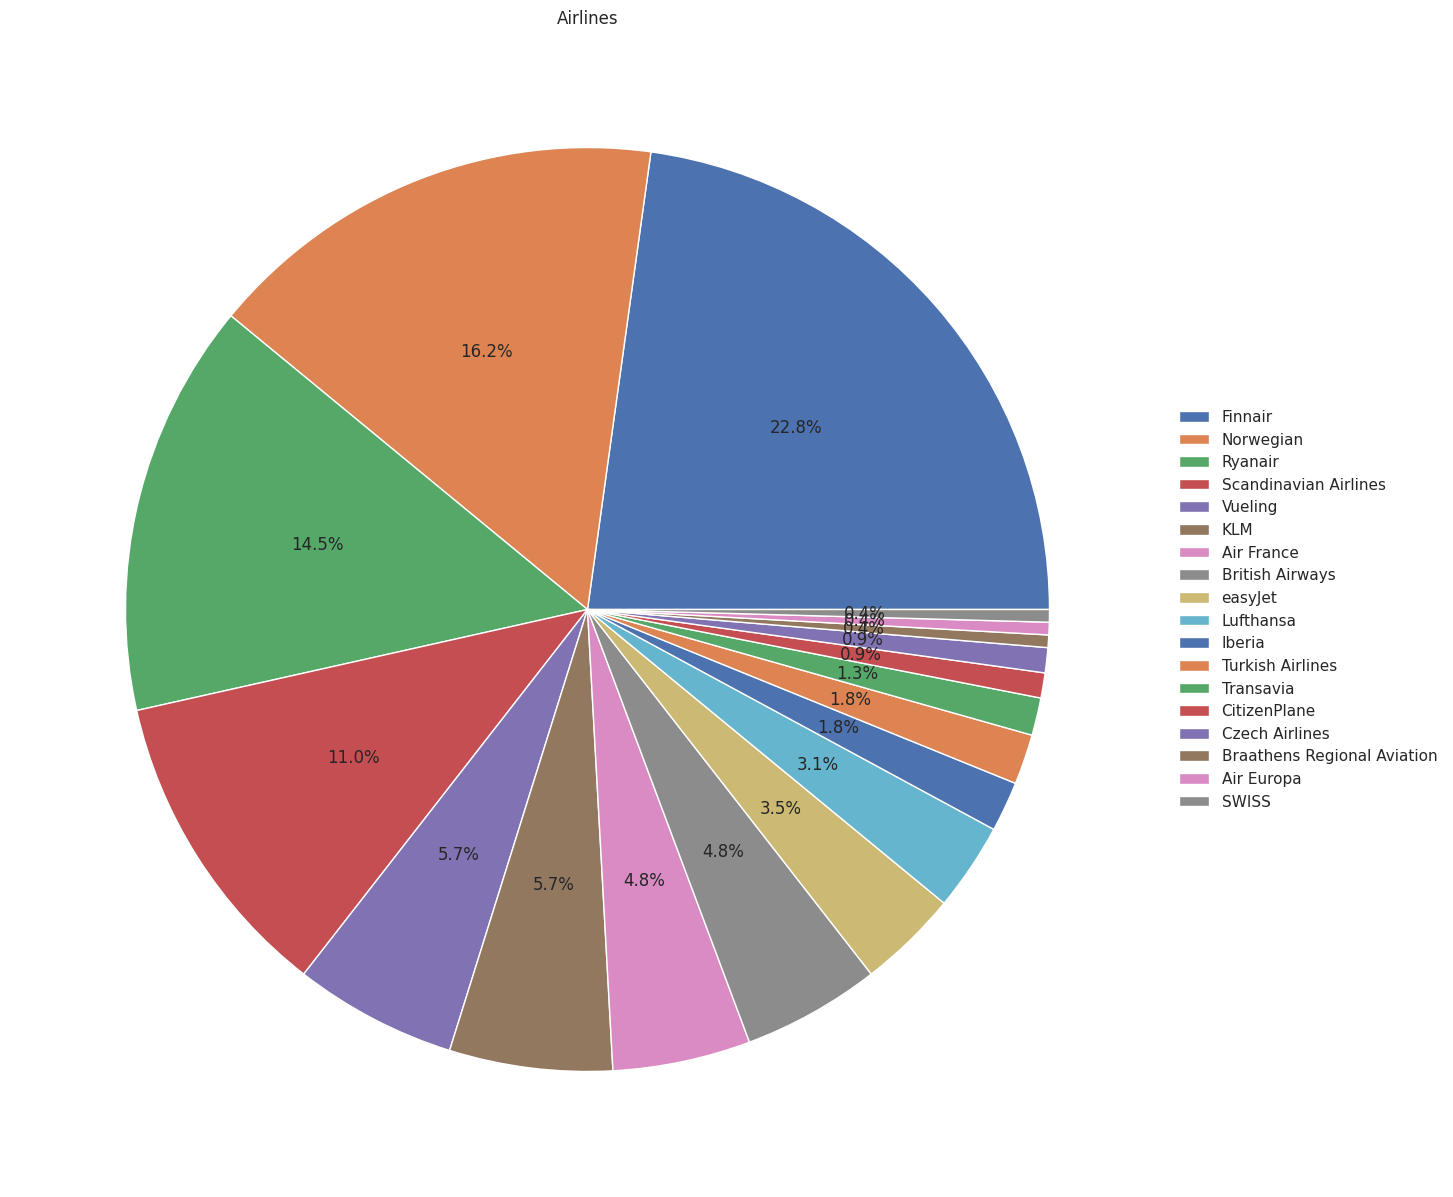

In [29]:
# Apply the default theme
sns.set_theme()

sns.relplot(
    data = final_list2,
    x = 'Duration (hours)', y = 'Price in €',
)


#sns.relplot(
#    data = final_list,
#    x = 'Airline', y = 'Price'
#)

sns.relplot(
    data = final_list2,
    x = 'Stops', y = 'Price in €',

)
plt.xticks([0, 1])

#final_list2.Airline.split(',')

airline_list = []

for i in range(len(final_list2.index)):
    index = final_list2.loc[[i], ['Airline']]
    #index = index.loc[['Airline'] == i, 'Airline'].values[i]
    index = index.astype({'Airline':'string'})
    s = ",".join(index.values[0])
    s = s.split(', ')

    airline_list.append(s)

piechart=piechart=pd.Series(airline_list).explode().value_counts()


#creating figure
plt.figure(figsize=(15, 15))

#plotting the piechart with names on the side
plt.pie(piechart,autopct='%1.1f%%')

#creating the box with names on the side
plt.legend(piechart.index,loc='center left', bbox_to_anchor=(1, 0.5))

#naming the piechart
plt.title('Airlines')
plt.show()

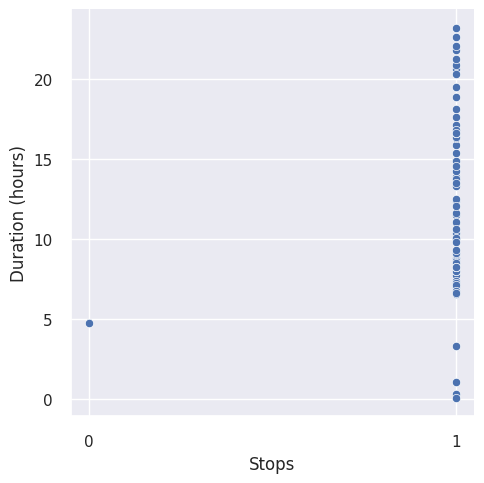

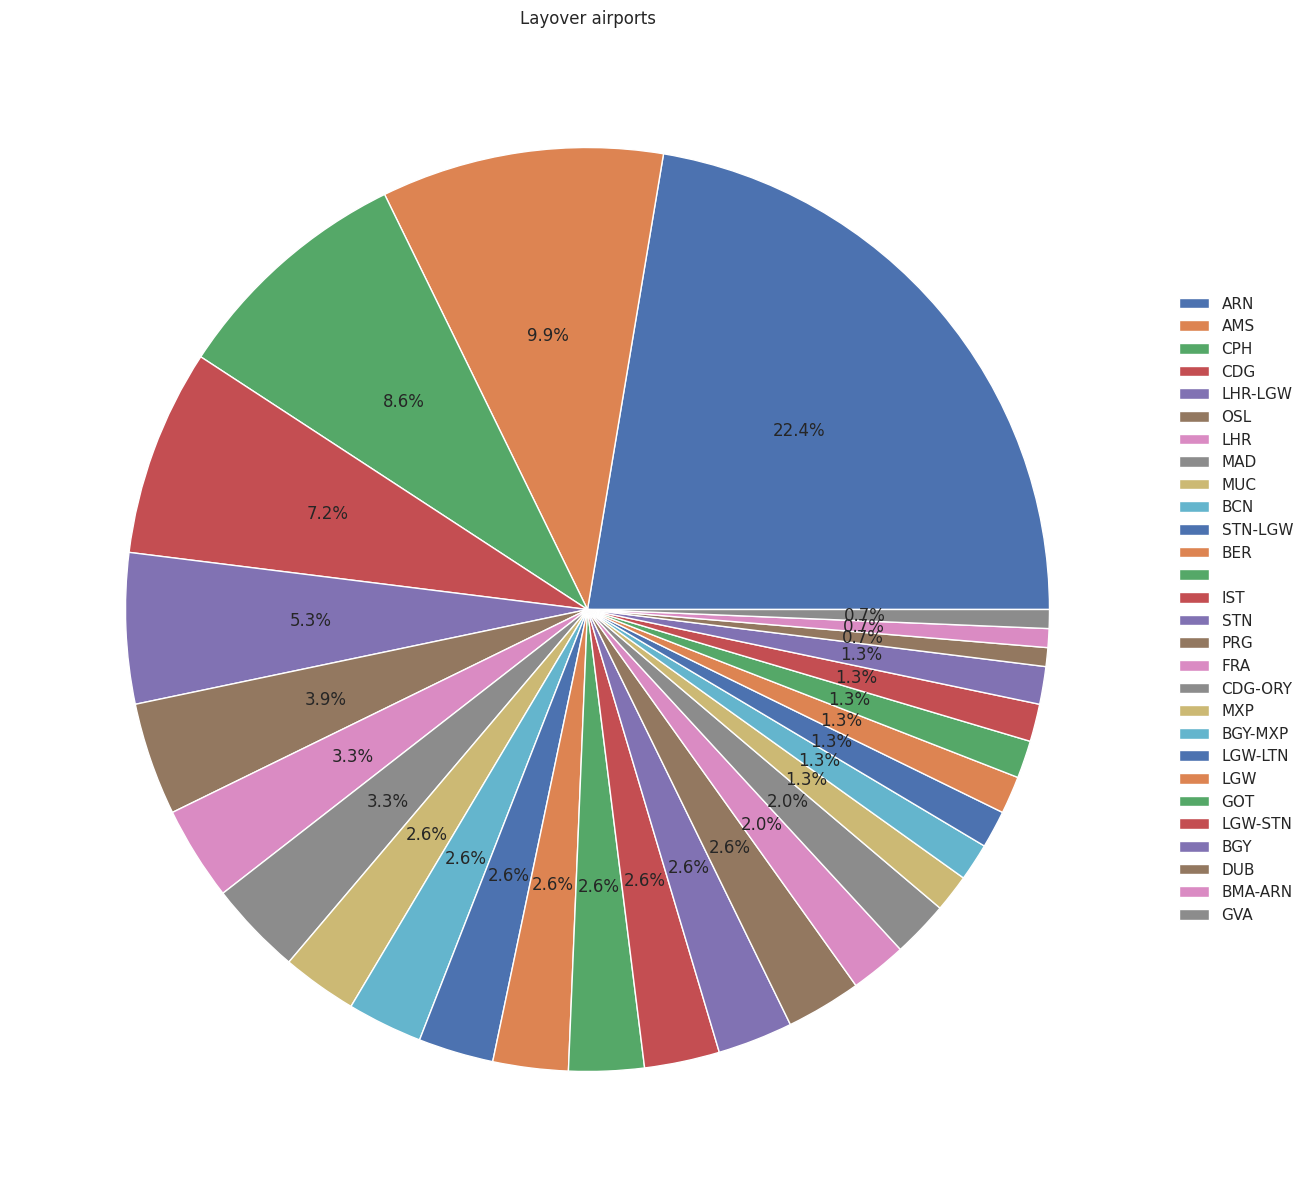

In [30]:
sns.relplot(
    data = final_list2,
    y = 'Duration (hours)', x = 'Stops'
)
plt.xticks([0, 1])


piechart=final_list2.Layover_place.explode().value_counts(normalize=True)

#creating figure
plt.figure(figsize=(15, 15))

#plotting the piechart with names on the side
plt.pie(piechart,autopct='%1.1f%%')

#creating the box with names on the side
plt.legend(piechart.index,loc='center left', bbox_to_anchor=(1, 0.5))

#naming the piechart
plt.title('Layover airports')
plt.show()

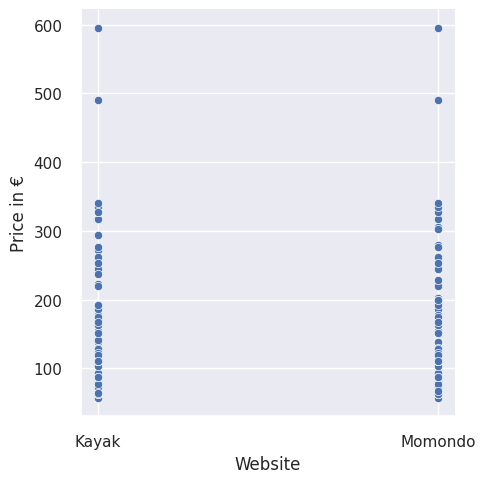

In [31]:
ax = sns.relplot(
    data = final_list2,
    y = 'Price in €', x = 'Website'
)

#ax.set(ylim=(final_list['Price'].min(), final_list['Price'].max()))
ax

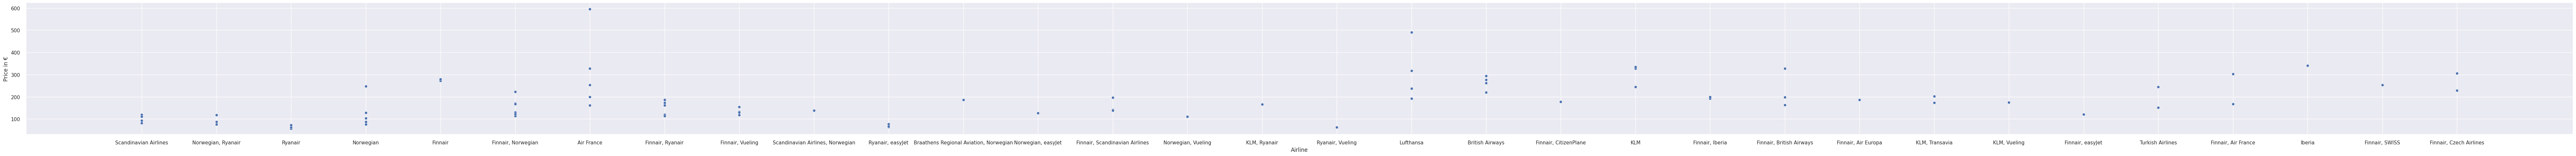

In [32]:
#plt.figure(figsize=(8, 20))

sns.set(rc={'figure.figsize':(100,500)})

#dims = (11.7, 8.27)
#df = final_list2
#fig, ax = pyplot.subplots(figsize=dims)

sns.relplot(
    data = final_list2,
    x = 'Airline', y = 'Price in €',
    aspect=160/10
)



In [33]:
def inputRange(minprice,maxprice,minduration,maxduration,minstops,maxstops):
  userdf=final_list2.copy()
  userdf=userdf.sort_values(by=["Price in €","Duration (hours)"],ascending=[True,True])
  userdf=userdf[(userdf['Price in €'] >= minprice) & (userdf['Price in €'] <= maxprice)]
  userdf=userdf[(userdf['Duration (hours)'] >= minduration) & (userdf['Duration (hours)'] <= maxduration)]
  userdf=userdf[(userdf['Stops'] >= minstops) & (userdf['Stops'] <= maxstops)]
  return userdf.head(10)

In [34]:

inputRange( int(input('Input the minimum for price range: ')),
            int(input('Input the maximum for the price range: ')),
            int(input('Input the minimum duration range (in hours): ')),
            int(input('Input the maximum duration range (in hours): ')),
            int(input('Input the minimum amount of layovers: ')),
            int(input('Input the maximum amount of layovers: ')))

Input the minimum for price range: 90
Input the maximum for the price range: 200
Input the minimum duration range (in hours): 4
Input the maximum duration range (in hours): 8
Input the minimum amount of layovers: 0
Input the maximum amount of layovers: 1


,Price in €,Airline,Duration (hours),Stops,Layover_place,Layover_time,Departure_time,Arrival_time,Website,ID
8,113.0,"Finnair, Norwegian",6.75,1,ARN,1t 25m,12:35,18:20,Kayak,8
84,113.0,"Finnair, Norwegian",6.75,1,ARN,1t 25m,12:35,18:20,Momondo,84
89,120.0,"Finnair, Ryanair",8.00,1,ARN,2t 30m,08:20,15:20,Momondo,89
13,121.0,"Finnair, Ryanair",8.00,1,ARN,2t 30m,08:20,15:20,Kayak,13
16,132.0,"Finnair, Vueling",7.42,1,BCN,1t 50m,17:05,23:30,Kayak,16
92,132.0,"Finnair, Vueling",7.42,1,BCN,1t 50m,17:05,23:30,Momondo,92
11,161.0,Air France,7.00,1,CDG,1t 10m,17:40,23:40,Kayak,11
87,161.0,Air France,7.00,1,CDG,1t 10m,17:40,23:40,Momondo,87
24,166.0,"Finnair, Ryanair",8.00,1,DUB,1t 50m,07:45,14:45,Kayak,24
19,173.0,"Finnair, Ryanair",7.25,1,BER,1t 40m,17:25,23:40,Kayak,19


In [35]:
def priceRange(min,max):
  userdf=final_list2.copy()
  userdf=userdf.sort_values(by="Price in €")#sorts the dataframe in ascending price order
  userdf=userdf[(userdf['Price in €'] >= min) & (userdf['Price in €'] <= max)]#filter the list according to wanted min max ranges
  return userdf.head(10)#shows 10 cheapest flights

In [36]:
priceRange(int(input('Input the minimum for price range: ')),int(input('Input the maximum for the price range: ')))

Input the minimum for price range: 150
Input the maximum for the price range: 200


,Price in €,Airline,Duration (hours),Stops,Layover_place,Layover_time,Departure_time,Arrival_time,Website,ID
62,151.0,Turkish Airlines,22.67,1,IST,14t 10,18:50,16:30+1,Kayak,62
139,151.0,Turkish Airlines,22.67,1,IST,14t 10,18:50,16:30+1,Momondo,139
34,155.0,"Finnair, Vueling",10.42,1,LHR-LGW,4t 25m,14:00,23:25,Kayak,34
111,155.0,"Finnair, Vueling",10.42,1,LHR-LGW,4t 25m,14:00,23:25,Momondo,111
11,161.0,Air France,7.00,1,CDG,1t 10m,17:40,23:40,Kayak,11
87,161.0,Air France,7.00,1,CDG,1t 10m,17:40,23:40,Momondo,87
103,162.0,"Finnair, Ryanair",9.17,1,PRG,3t 40m,06:20,14:30,Momondo,103
46,163.0,"Finnair, British Airways",17.08,1,LHR-LGW,11t 10,19:35,11:40+1,Kayak,46
122,163.0,"Finnair, British Airways",17.08,1,LHR-LGW,11t 10,19:35,11:40+1,Momondo,122
27,163.0,"Finnair, Ryanair",9.17,1,PRG,3t 40m,06:20,14:30,Kayak,27


In [37]:
#Function for looking for the duration of the flights
def durationRange(min,max):
  userdf=final_list2.copy()
  userdf=userdf.sort_values(by="Price in €",ascending=True)#sorts the dataframe in duration order from smallest to largest duration
  userdf=userdf[(userdf['Duration (hours)'] >= min) & (userdf['Duration (hours)'] <= max)]#filter the list according to wanted min max ranges
  return userdf.head(10) # shows the 10 cheapest flights

In [38]:


durationRange(int(input('Input the minimum duration range (in hours): ')),int(input('Input the maximum duration range (in hours): ')))

Input the minimum duration range (in hours): 6
Input the maximum duration range (in hours): 10


,Price in €,Airline,Duration (hours),Stops,Layover_place,Layover_time,Departure_time,Arrival_time,Website,ID
6,76.0,"Norwegian, Ryanair",8.67,1,ARN,3t 05m,07:40,15:20,Kayak,6
82,76.0,"Norwegian, Ryanair",8.67,1,ARN,3t 05m,07:40,15:20,Momondo,82
80,82.0,Scandinavian Airlines,8.83,1,CPH,3t 15m,10:05,17:55,Momondo,80
4,82.0,Scandinavian Airlines,8.83,1,CPH,3t 15m,10:05,17:55,Kayak,4
1,87.0,"Norwegian, Ryanair",7.08,1,ARN,1t 40m,09:15,15:20,Kayak,1
77,87.0,"Norwegian, Ryanair",7.08,1,ARN,1t 40m,09:15,15:20,Momondo,77
76,92.0,Scandinavian Airlines,8.83,1,CPH,3t 15m,10:05,17:55,Momondo,76
0,92.0,Scandinavian Airlines,8.83,1,CPH,3t 15m,10:05,17:55,Kayak,0
81,93.0,Scandinavian Airlines,8.17,1,ARN,2t 45m,10:15,17:25,Momondo,81
5,93.0,Scandinavian Airlines,8.17,1,ARN,2t 45m,10:15,17:25,Kayak,5


In [39]:
def startTimeRange(min,max):    #Trying to make a function to let the user select a starting time for the flight
  userdf=final_list2.copy()

  departure_time_list = []

  for i in range(len(userdf.index)):
    index = final_list2.loc[[i], ['Departure_time']]
    #index = index.loc[['Airline'] == i, 'Airline'].values[i]
    index = index.astype({'Departure_time':'string'})
    index = index.values[0].replace(':','')
    #s = ":".join(index.values[0])
    #s = s.split(':')
    #s = s.astype({'Departure_time':'int'})

    departure_time_list.append(int(index))

  userdf=departure_time_list.sort_values(by="Departure_time",ascending=True)#sorts the dataframe in duration order from soonest to latest departure time
  userdf=userdf[(userdf['Departure_time'] >= min) & (userdf['Departure_time'] <= max)]#filter the list according to wanted min max ranges
  return userdf.head(10) # shows the 10 first results

In [40]:
startTimeRange(int(input('Input the soonest departure time: ')),int(input('Input the latest departure time: ')))

Input the soonest departure time: 0700
Input the latest departure time: 1600


AttributeError: ignored